# 1. OLS (Ordinary Least Squares)
The market effect is removed from coin price data. You can get three csv files which are log return, (market effect) filtered log return and regression statistics.

OUTPUT PATH: data

In [ ]:
import scipy.stats as ss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_m = pd.read_csv("data/coingecko_usd_market_cap.csv")
df_p = pd.read_csv("data/coingecko_usd_price.csv")

In [ ]:
logret = np.log(df_p / df_p.shift(1))

In [ ]:
market_caps = df_m.iloc[:,1:].sum(axis=1)

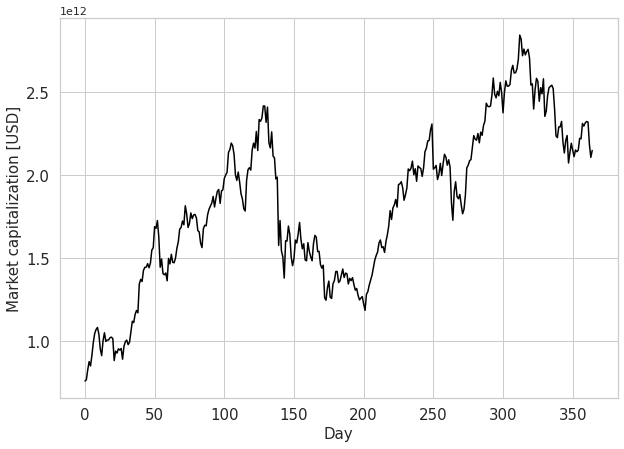

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="husl")

fs=15
market_caps.plot(color="k", figsize=(10,7))
plt.xlabel("Day", fontsize=fs)
plt.ylabel("Market capitalization [USD]", fontsize=fs)

# tick size
plt.tick_params(axis='both', which='major', labelsize=fs)

In [ ]:
market_caps.shift(1)

0               NaN
1      7.593101e+11
2      7.663576e+11
3      8.266925e+11
4      8.762718e+11
           ...     
360    2.316508e+12
361    2.324775e+12
362    2.321338e+12
363    2.186231e+12
364    2.108481e+12
Length: 365, dtype: float64

In [ ]:
r = np.log(market_caps / market_caps.shift(1))
r_market_caps = np.nan_to_num(x=r, nan=0.)

<AxesSubplot: >

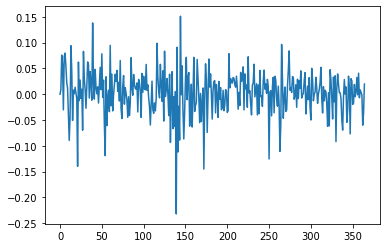

In [ ]:
# log return of market cap
pd.Series(r_market_caps).plot()

In [ ]:
r_market_caps = pd.Series(r_market_caps)

In [ ]:
r = np.log(df_p.iloc[:,1:] / df_p.iloc[:,1:].shift(1))
r_coin = np.nan_to_num(x=r, nan=0.)

In [ ]:
r_coin = pd.DataFrame(r_coin, columns=df_p.columns.drop("uts"))

In [ ]:
# beta만 제거
df_yf = pd.DataFrame()

Beta = []
Alpha = []
R_squared = []
Standard_error = []

for i in range(len(r_coin.columns)):
    y = r_coin.iloc[:,i]
    b_ss, a_ss, r_ss, _, std_err_ss = ss.linregress(r_market_caps, y)
#     print("Linear regression results:\nbeta: {0:6f}, alpha: {1:6f}, R2: {2:6f}, \
#     standard error: {3:6f}.".format(b_ss, a_ss, r_ss**2, std_err_ss))
    Beta.append(b_ss)
    Alpha.append(a_ss)
    R_squared.append(r_ss**2)
    Standard_error.append(std_err_ss)
    
    y_f = y - b_ss * r_market_caps
    
    dy_f = pd.Series(y_f, name=r_coin.columns[i])
    df_yf = pd.concat([df_yf, dy_f], axis=1)

# Save
r_coin.to_csv("data/coin_log_return.csv", index=False)
df_yf.to_csv("data/coin_log_return_filtered.csv", index=False)

df_csv = pd.DataFrame(columns=["coin", "beta", "alpha", "R_squared", "standard_error"])
df_csv["coin"] = r_coin.columns.to_list()
df_csv["beta"] = Beta
df_csv["alpha"] = Alpha
df_csv["R_squared"] = R_squared
df_csv["standard_error"] = Standard_error
df_csv.to_csv("data/regression_stats.csv", index=False)

# Figure

In [ ]:
import seaborn as sns
# define and map colors
colors = sns.color_palette("husl",8).as_hex()
colors

['#f77189',
 '#ce9032',
 '#97a431',
 '#32b166',
 '#36ada4',
 '#39a7d0',
 '#a48cf4',
 '#f561dd']

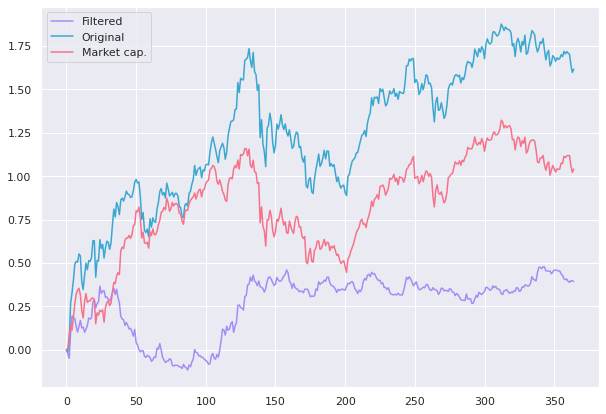

In [ ]:
coin = "ethereum"

import seaborn as sns
sns.set_theme(style="darkgrid", palette="husl")

fs=15

df_yf[coin].cumsum().plot(figsize=(10,7), color=colors[-2])
r_coin[coin].cumsum().plot(color=colors[-3])
r_market_caps.cumsum().plot(color=colors[0])
plt.legend(["Filtered", "Original", "Market cap."])

<AxesSubplot:>

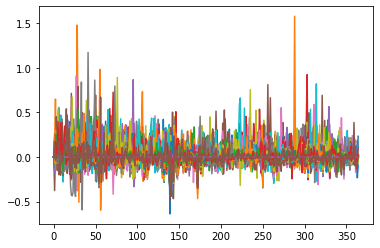

In [ ]:
# Before
r_coin.plot(legend=False)

<AxesSubplot:>

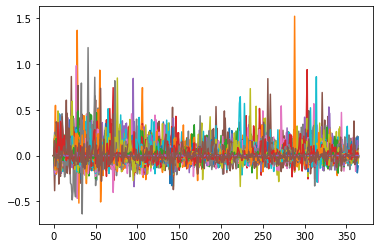

In [ ]:
# After
df_yf.plot(legend=False)

In [ ]:
r_coin

,tether,bitcoin,ethereum,binance-usd,usd-coin,ripple,solana,bitcoin-cash,binancecoin,matic-network,...,gemini-dollar,ecomi,link,coinex-token,huobi-btc,swissborg,nxm,coinmetro,compound-usdt,pha
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001939,0.011296,-0.011533,-0.001173,-0.002007,0.073847,0.194437,-0.006644,0.013612,0.013770,...,-0.002139,0.112963,0.011259,0.048512,0.011551,0.000807,-0.010780,0.096886,0.000635,0.171615
2,0.001125,0.091477,0.063089,0.003327,0.003115,-0.067810,-0.021139,0.038987,0.011376,0.065615,...,0.004026,-0.025463,-0.076467,0.017180,0.084076,-0.081313,0.059423,0.169292,0.029709,-0.035401
3,-0.002395,0.025914,0.217863,-0.004085,-0.006040,0.016835,0.175155,0.167479,0.068857,0.046689,...,-0.013225,-0.031727,0.024303,0.031754,0.036328,0.065184,0.254424,-0.010299,-0.018671,0.006000
4,-0.001015,-0.046275,0.058887,-0.018595,-0.015849,0.039035,0.120103,-0.053992,-0.027419,0.172839,...,-0.003514,0.129557,-0.058200,0.023686,-0.055914,0.052831,0.006923,0.009465,-0.032845,-0.016460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.000710,0.003731,-0.008684,-0.000235,0.000051,-0.006469,0.025076,-0.011861,-0.002314,0.086182,...,0.002986,-0.037863,-0.065729,0.009117,-0.021080,-0.005275,-0.008468,0.064265,0.001132,-0.094816
361,-0.001308,-0.001551,-0.007384,-0.001066,-0.000050,0.006787,-0.010949,0.029770,0.030936,-0.052146,...,-0.003533,0.058528,-0.035279,-0.006379,0.015582,0.016192,-0.007016,0.020675,-0.000702,-0.050439
362,-0.000108,-0.061927,-0.060558,-0.000863,-0.000029,-0.078636,-0.094860,-0.052657,-0.051794,-0.086819,...,0.002216,-0.046619,-0.080467,-0.063602,-0.061627,-0.013986,-0.060293,-0.087547,0.000798,-0.102187
363,0.001813,-0.025856,-0.043743,0.002379,0.005270,-0.045524,-0.040200,-0.025446,-0.041875,-0.012181,...,-0.001206,-0.037967,0.010097,-0.036700,-0.020183,-0.025168,-0.045010,0.017430,0.000521,-0.049554


In [ ]:
df_yf

,tether,bitcoin,ethereum,binance-usd,usd-coin,ripple,solana,bitcoin-cash,binancecoin,matic-network,...,gemini-dollar,ecomi,link,coinex-token,huobi-btc,swissborg,nxm,coinmetro,compound-usdt,pha
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001928,0.002638,-0.022376,-0.001335,-0.002156,0.062824,0.184987,-0.018630,0.002112,0.000740,...,-0.002881,0.105773,0.001334,0.039235,0.002250,-0.007077,-0.021362,0.092138,0.000449,0.162095
2,0.001040,0.020452,-0.025852,0.001996,0.001891,-0.158237,-0.098658,-0.059333,-0.082958,-0.041274,...,-0.002062,-0.084445,-0.157885,-0.058916,0.007780,-0.145986,-0.027379,0.130349,0.028180,-0.113492
3,-0.002460,-0.028672,0.149507,-0.005108,-0.006981,-0.052663,0.115578,0.091916,-0.003643,-0.035461,...,-0.017903,-0.077058,-0.038270,-0.026729,-0.022309,0.015481,0.187712,-0.040229,-0.019845,-0.054017
4,-0.000981,-0.017902,0.094417,-0.018063,-0.015360,0.075158,0.151070,-0.014716,0.010264,0.215538,...,-0.001082,0.153118,-0.025676,0.054084,-0.025436,0.078666,0.041598,0.025021,-0.032235,0.014735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.000706,0.000392,-0.012864,-0.000297,-0.000007,-0.010720,0.021432,-0.016482,-0.006748,0.081158,...,0.002700,-0.040636,-0.069556,0.005541,-0.024666,-0.008314,-0.012548,0.062434,0.001060,-0.098486
361,-0.001306,-0.000164,-0.005648,-0.001040,-0.000026,0.008552,-0.009436,0.031690,0.032778,-0.050059,...,-0.003414,0.059680,-0.033689,-0.004893,0.017072,0.017455,-0.005321,0.021435,-0.000672,-0.048915
362,-0.000040,-0.005728,0.009818,0.000191,0.000939,-0.007085,-0.033522,0.025139,0.022849,-0.002242,...,0.007033,0.000051,-0.016044,-0.003391,-0.001257,0.037186,0.008390,-0.056732,0.002008,-0.040396
363,0.001853,0.008081,-0.001245,0.003015,0.005855,-0.002316,-0.003160,0.021533,0.003199,0.038893,...,0.001703,-0.009784,0.049000,-0.000340,0.016272,0.005734,-0.003534,0.036038,0.001251,-0.012240


<AxesSubplot:>

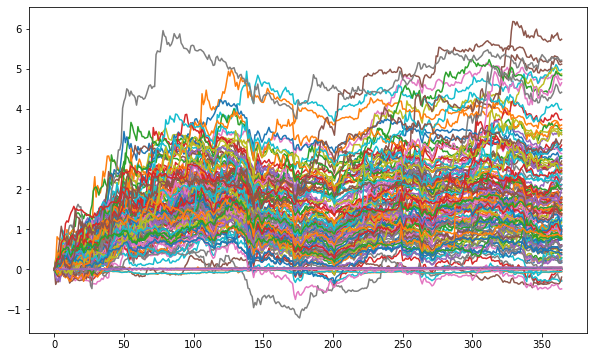

In [ ]:
# Before
r_coin.cumsum().plot(legend=False, figsize=(10,6))

<AxesSubplot:>

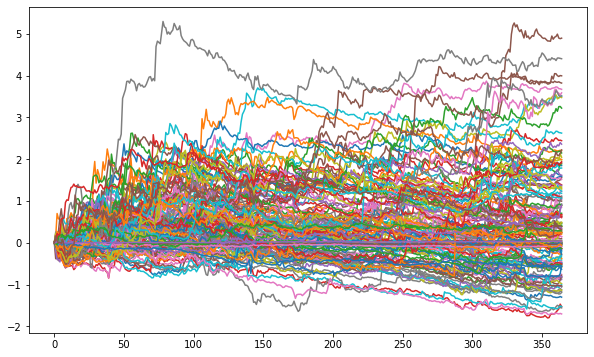

In [ ]:
# After
df_yf.cumsum().plot(legend=False, figsize=(10,6))